<a id="top"></a>
<a href="https://nbviewer.jupyter.org/github/hufe09/pydata_practice/blob/master/data_visualization/animations_with_matplotlib.ipynb">Jupyter Notebook</a>

# 用Matplotlib制作动画

Matplotlib的`animation`类处理其动画部分。它提供了一个框架，围绕这个框架构建动画功能。有两个主要接口可以实现这一点:

* `FuncAnimation` 通过反复调用函数func来制作动画。
* `ArtistAnimation` 一组固定的艺术家对象。

然而，在这两者中，FuncAnimation是最方便使用的一个。您可以在文档中阅读更多关于它们的内容，因为我们只关心FuncAnimation工具。

## 准备

应安装包括“numpy”和“matplotlib”在内的模块。 要将系统中的动画保存为mp4或gif，需要安装 [ffmpeg](https://www.ffmpeg.org/) 或 [imagemagick](http://SourceForge.net/projects/imagemagick/files/)。

### 基本动画: 移动正弦波

让我们使用FuncAnimation来创建正弦波在屏幕上移动的基本动画。该动画的源代码取自[Matplotlib Animation tutorial](http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)。让我们先看看输出，然后我们将分解代码来理解发生了什么。

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

anim.save('sine_wave.gif', writer='pillow')

In [2]:
from IPython.display import IFrame
IFrame('https://cdn-images-1.medium.com/max/800/1*Aa4huCJefHt7nlX3nKQKGA.gif', width=800, height=500)

## 成长的线圈

在[GeeksforGeeks](https://www.geeksforgeeks.org/graph-plotting-python-set-3/)有一个很好的创建形状的例子。现在让我们在matplotlib动画类的帮助下，创建一个慢慢展开的动圈。该代码非常类似于正弦波图，只需稍加调整。

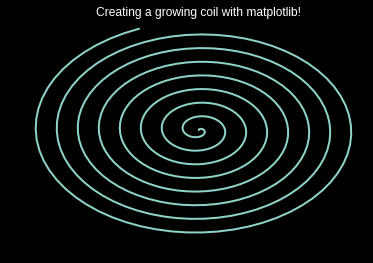

In [3]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('dark_background')

fig = plt.figure() 
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50)) 
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 
   # t is a parameter 
    t = 0.1*i 
    
    # x, y values to be plotted 
    x = t*np.sin(t) 
    y = t*np.cos(t) 
    
    # appending new points to x, y axes points list 
    xdata.append(x) 
    ydata.append(y) 
    line.set_data(xdata, ydata) 
    return line, 
    
# setting a title for the plot 
plt.title('Creating a growing coil with matplotlib!') 
# hiding the axis details 
plt.axis('off') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=500, interval=20, blit=True) 

# save the animation as mp4 video file 
anim.save('coil.gif',writer='pillow') 

In [4]:
IFrame('https://cdn-images-1.medium.com/max/800/1*PTB0eo-elq7C5EOGekgBFg.gif', width=800, height=300)

## 实时更新图表


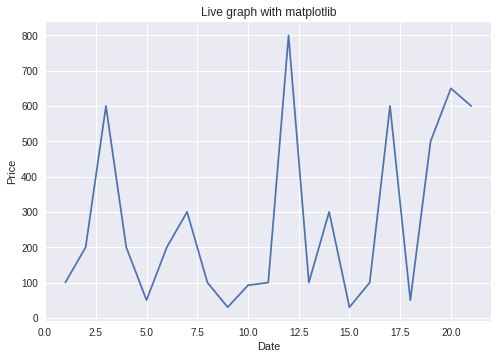

In [5]:
#importing libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('seaborn')

fig = plt.figure()
#creating a subplot 
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    data = open('stock.txt','r').read()
    lines = data.split('\n')
    xs = []
    ys = []
   
    for line in lines:
        x, y = line.split(',') # Delimiter is comma    
        xs.append(float(x))
        ys.append(float(y))
   
    
    ax1.clear()
    ax1.plot(xs, ys)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Live graph with matplotlib')	
    
ani = animation.FuncAnimation(fig, animate, interval=1000) 
plt.show();

In [17]:
IFrame('https://cdn-images-1.medium.com/max/800/1*nzPptovV8Gwp_6vHWoo3PQ.gif', width=800, height=500)

# 3D绘图中的动画

In [ ]:
%%script False
"""
Create a folder called volcano in the same directory as the notebook. 
All the images will be stored in this folder which will be then used in the animation.
"""

# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)

# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]

# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes

# We are going to do 20 plots, for 20 different angles
for angle in range(70,210,2):

# Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

    ax.view_init(30,angle)

    filename='Volcano/Volcano_step'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()
    
    
"""
This will create multiple PNG files in the VOlcano folder. 
Now, use ImageMagick to transform them into animation. 
Open Terminal and navigate to the Volcano folder and enter the following command:
"""

# convert -delay 10 Volcano*.png animated_volcano.gif
    

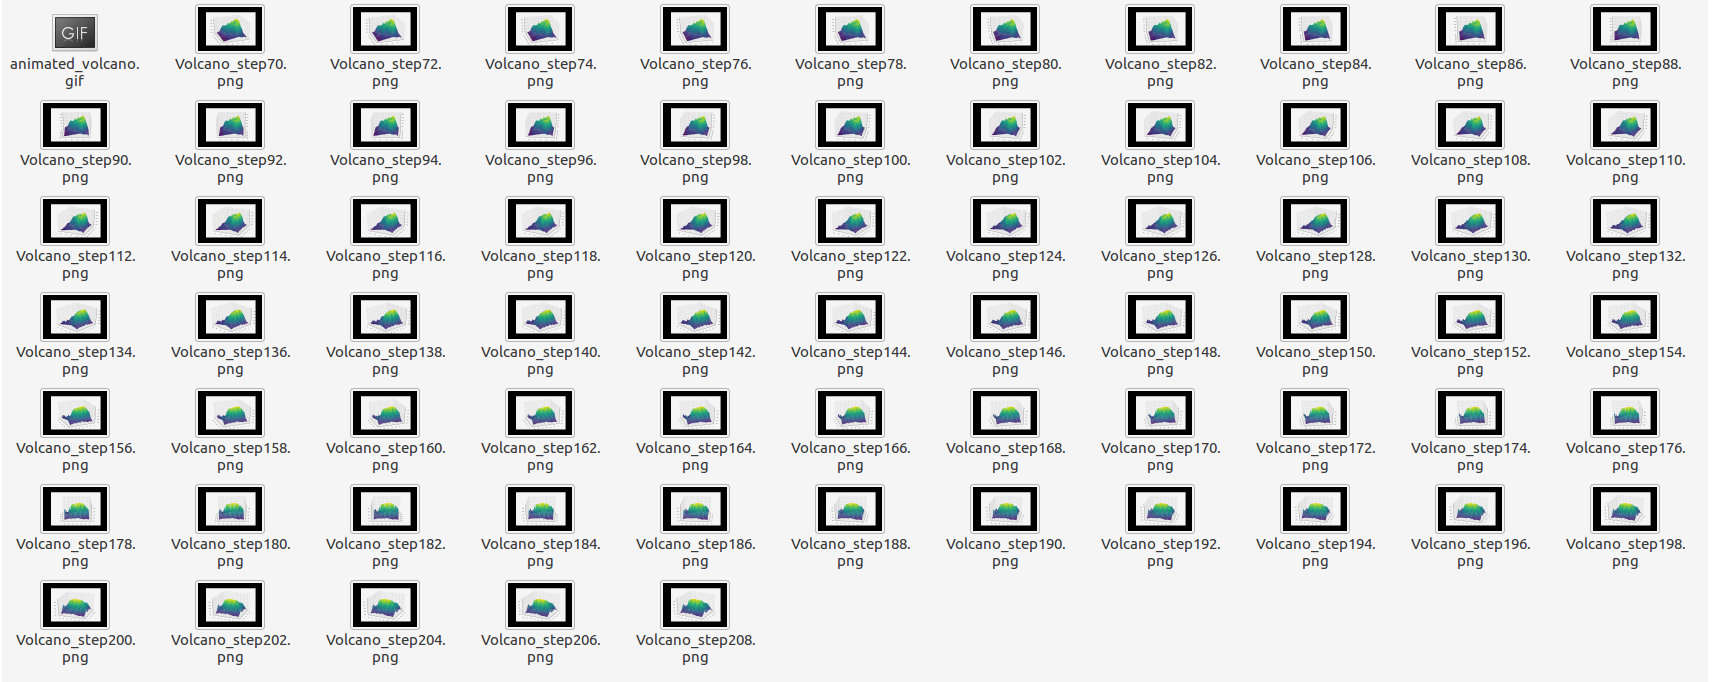

In [7]:
from IPython.display import Image
Image(filename='Volcano/volcanoScreenshot.png')

进入`Volcano`文件夹,运行`convert -delay 10 Volcano*.png animated_volcano.gif`即可生成3D图

In [8]:
IFrame('https://cdn-images-1.medium.com/max/800/1*d4zkPDg9EmViFVWR1YwBtg.gif', width=800, height=400)

## Celluloid 动画

[Celluloid](https://github.com/jwkvam/celluloid)是一个Python模块，它简化了在matplotlib中创建动画的过程。这个库创建了一个matplotlib图形，并从中创建了一个“Camera”。然后，它会重复使用图形，在创建每一帧后，用相机拍摄快照。最后，用所有捕获的帧创建一个动画。

In [9]:
#Installation
# !pip install celluloid

### Minimal

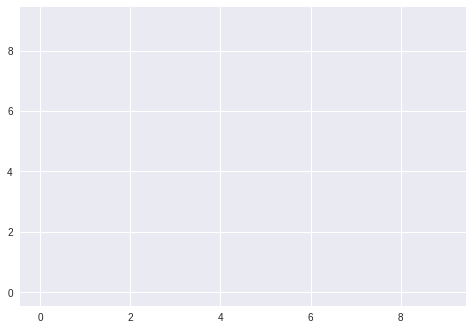

In [10]:
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)
for i in range(10):
    plt.plot([i] * 10)
    camera.snap()
animation = camera.animate()
animation.save('celluloid_minimal.gif', writer = 'pillow')

In [11]:
IFrame('https://cdn-images-1.medium.com/max/800/1*_tACybhkQyYA9OT1X9vjpg.gif', width=800, height=350)

### Subplots

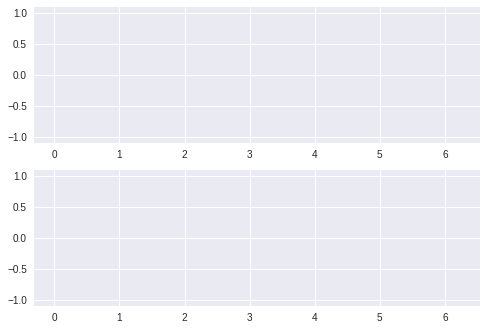

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from celluloid import Camera

fig, axes = plt.subplots(2)
camera = Camera(fig)
t = np.linspace(0, 2 * np.pi, 128, endpoint=False)
for i in t:
    axes[0].plot(t, np.sin(t + i), color='blue')
    axes[1].plot(t, np.sin(t - i), color='blue')
    camera.snap()
    
animation = camera.animate()  
animation.save('celluloid_subplots.gif', writer = 'pillow')

In [14]:
IFrame('https://cdn-images-1.medium.com/max/800/1*RGZ74r_IsSypAhzvQ-RgXQ.gif', width=800, height=350)

### Legends

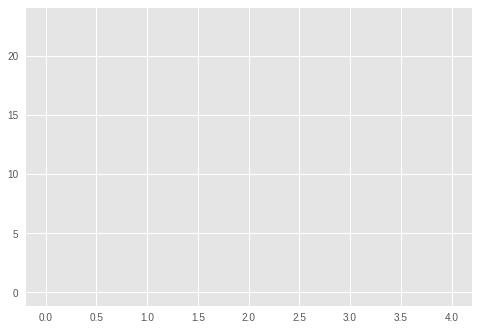

In [15]:
import matplotlib
from matplotlib import pyplot as plt
from celluloid import Camera
plt.style.use('ggplot')

fig = plt.figure()
camera = Camera(fig)
for i in range(20):
    t = plt.plot(range(i, i + 5))
    plt.legend(t, [f'line {i}'])
    camera.snap()
animation = camera.animate()
animation.save('celluloid_legends.gif', writer = 'pillow')

In [16]:
IFrame('https://cdn-images-1.medium.com/max/800/1*mNZIvuinUvB-JCqynmJQzQ.gif', width=800, height=350)

<h5><a href="#top" >Back to Top</a></h5>
<h5><a href="https://hufe09.github.io/archive/?tag=Data+Visualization">Hufe Blog</a><h5>